# Objective
* Review camera locations in Calgary and find correlation to accident counts

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

import Grid_Analysis as ga
import Accidents as acc

# Import Camera DataSet

In [2]:
camera = pd.read_csv('Data/Traffic_Camera_Locations.csv')
camera

,Camera Location,Quadrant,Camera URL,longitude,latitude
0,Stoney Trail / Deerfoot Trail SE,SE,http://trafficcam.calgary.ca/loc86.jpg,-113.976606,50.900726
1,Memorial Drive / 52 Street E,NE,http://trafficcam.calgary.ca/loc3.jpg,-113.955818,51.053253
2,Crowchild Trail / Shaganappi Trail NW,NW,http://trafficcam.calgary.ca/loc37.jpg,-114.149379,51.098849
3,Crowchild Trail / Sarcee Trail NW,NW,http://trafficcam.calgary.ca/loc126.jpg,-114.178204,51.111255
4,Airport Trail / Barlow Trail NE,NE,http://trafficcam.calgary.ca/loc114.jpg,-114.001451,51.139352
...,...,...,...,...,...
121,Memorial Drive / Edmonton Trail NE,NE,http://trafficcam.calgary.ca/loc30.jpg,-114.050136,51.050802
122,Glenmore Trail / Barlow Trail SE,SE,http://trafficcam.calgary.ca/loc98.jpg,-113.981495,50.979446
123,Glenmore Trail / Stoney Trail SE,SE,http://trafficcam.calgary.ca/loc128.jpg,-113.929263,50.979635
124,5 Avenue / 5 Street SW,SW,http://trafficcam.calgary.ca/loc122.jpg,-114.073644,51.048677


# Analyze

## Distribution of Traffic Cameras

In [3]:
base_coordinates = [51.044270, -114.062019]
map = folium.Map(location=base_coordinates)

camera_cluster = MarkerCluster().add_to(map)

for idx, row in camera.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                 popup='camera').add_to(camera_cluster)

map

## Accidents Distribution

In [4]:
accident_counts = acc.get_accident_counts_by_location()
accident_counts

,Accident Count
"(50.994156675722, -114.039173086226)",68
"(51.048859876417, -114.019434255636)",65
"(51.067379869342, -114.028551292521)",56
"(50.996389267837, -114.101595818037)",48
"(51.000997134752, -114.121071289426)",39
...,...
"(51.175791210827, -113.996243265587)",1
"(51.044835179754, -114.088761055272)",1
"(51.049154211001, -114.017666035305)",1
"(51.023323507668, -114.000798654854)",1


In [5]:
base_coordinates = [51.044270, -114.062019]
map = folium.Map(location=base_coordinates)

accident_cluster = MarkerCluster().add_to(map)

for idx, row in accident_counts.iterrows():
    loc = idx.strip('()').split(',')
    loc = [float(i) for i in loc]
    folium.Marker(loc, popup='accident').add_to(accident_cluster)

map

## Scatter Plot

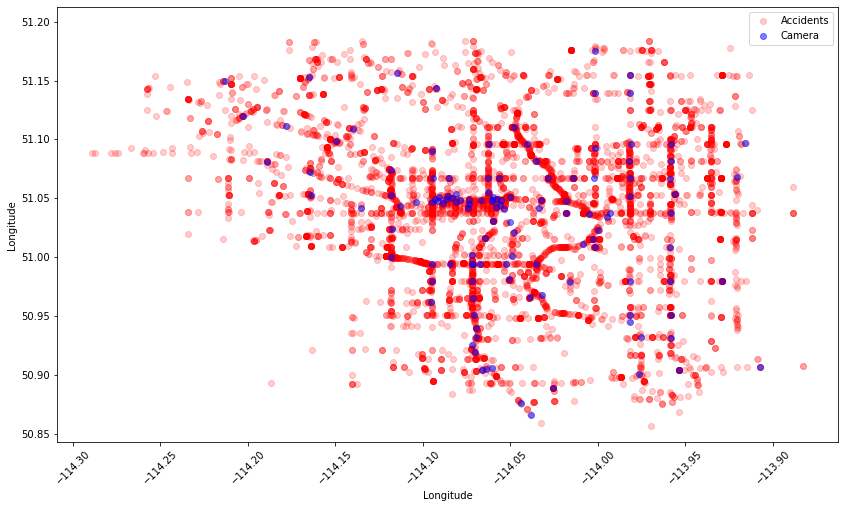

In [7]:
accidents = acc.extract_accidents('Data/Traffic_Incidents.csv', '2018')

plt.figure(figsize=(14,8))
plt.scatter(x = 'longitude', y = 'latitude', data = accidents, label = 'Accidents', c='r', alpha=0.2)
plt.scatter(x = 'longitude', y = 'latitude', data=camera, label = 'Camera', c='b', alpha=0.5)
plt.ylim(50.842822, 51.212425)
plt.xticks(rotation=45)
plt.xlabel('Longitude')
plt.ylabel('Longitude')
plt.legend()